In [1]:
#importing the essentials
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#the path to each file
dr='dataset\SCG_b6\\'
mean_file='v2_26052020_mean_IM_marked.csv'
amp_a_file='SCG_b6_AOpeak_a.csv'
index_a_file='SCG_b6_AOpeak_i.csv'

In [4]:
#to open the files
mean=open(dr+mean_file,'r')
amp=open(dr+amp_a_file,'r')
index=open(dr+index_a_file,'r')

In [7]:
#getting the data and converting it to the required format and storing in the variables
mn=[]
for i in mean.read().split('\n'):
    if i != '':
        mn.append([float(i.split('e')[0])/10,0])
ampl=[]
for i in amp.read().split('\n'):
    if i != '':
        ampl.append(float(i.split('e')[0])/10)
ind=[]    
for i in index.read().split('\n'):
    if '' != i:
        g=i.split('+')
        g=float(g[0][:-1])*(10**int(g[1]))
        ind.append(int(g))

"ind=[]    \nfor i in index.read().split('\n'):\n    if '' != i:\n        g=i.split('+')\n        g=float(g[0][:-1])*(10**int(g[1]))\n        ind.append(int(g))"

In [8]:
#rounding the values for 6 digits for better caluculation
mn1=[]
for i in mn:
    mn1.append([round(i[0],6),i[1]])
mn=list(mn1)
ampl2=[]
for i in ampl:
    ampl2.append(round(i,6))
ampl=list(ampl2)    

In [317]:
#converting the amplitude into tuple for marking 
ampl1=[]
for i in ampl:
    ampl1.append([i,0])
ampl1[0:10]    

[[0.772846, 0],
 [0.725053, 0],
 [0.770262, 0],
 [0.786542, 0],
 [0.82042, 0],
 [0.805318, 0],
 [0.827602, 0],
 [0.76948, 0],
 [0.747926, 0],
 [0.711164, 0]]

In [319]:
#counting the AO point
count=0
for i in ampl1:
    if i in mn1:
        count+=1
count        

291

In [320]:
#marking the IM point in the data
my=0
yes=0
jk=[]
o=len(mn)
for i in range(o):
    if mn[i] in ampl1 and ({(i+1)%100000 in ind} or {i%100000 in ind} or {(i-1)%100000 in ind}):
        my+=1
        mn[i][1]=1
        jk.append(mn1[i][0])
    else:
        yes+=1
print("no of values present : "+str(my))
print("no of values missing : "+str(yes))

no of values present : 564
no of values missing : 1499436


In [26]:
#TO find the repeated values
repeat=[]
rp=[]
index_repeat=[]
o=len(mn)
print(o)
for i in range(o):
    if mn[i][0] in ampl:
        if mn[i][0] not in rp and mn[i][1]==1:
            rp.append(mn[i][0])
            repeat.append([mn[i][0],1,[i+1]])
        elif mn[i][1]==1:
            for jh in range(len(repeat)):
                if repeat[jh][0]==mn[i][0] and mn[i][1]==1:
                    repeat[jh][1]+=1
                    repeat[jh][2].append(i+1)
print(len(repeat))

1500000
291


In [27]:
#To find the repeated values which are repeated and also near to each other
true_rep=[]
for i in repeat:
    if i[1] >1:
        true_rep.append(i)
print(len(true_rep)) 

0


In [20]:
#to find the values which should be deleted
to_be_discarded=[]
for i in true_rep:
    j=i[2]
    j=list(set(j).difference(set([max((j))])))
    to_be_discarded+=j
print("finished")    

finished


In [24]:
#deleting the values which are repeated
for i in to_be_discarded:
    mn[i-1][1]=0

In [418]:
all_index=[]
for i in true_rep:
    all_index.extend(i[2])
len(all_index)

232

In [419]:
#to find all the indexes of amplitudes which are down peaks
findout=[]
for i in all_index:
    if max(mn[i-4][0],mn[i-3][0],mn[i-2][0],mn[i-1][0])==mn[i-1][0]:
        if max(mn[i-1][0],mn[i][0],mn[i+1][0],mn[i+2][0])==mn[i-1][0]:
            findout.append(i)
print(findout)

[875198, 1365999, 476741, 283106, 67308, 55911, 55912, 55913, 55914, 77089, 82023, 96981, 781504, 158513, 163027, 163028, 172324, 183528, 183529, 189352, 189353, 251740, 879635, 256962, 256963, 262049, 266574, 266575, 271601, 1469356, 1483453, 298868, 562919, 485973, 683358, 351400, 360641, 365806, 370279, 374525, 1193544, 379108, 379109, 1083616, 1083617, 387752, 387753, 392962, 392963, 481512, 466371, 964671, 698970, 698971, 445562, 445563, 451151, 456350, 456351, 1172748, 496161, 794965, 794966, 896756, 568118, 892362, 1255096, 613739, 613740, 1374933, 887983, 887984, 883830, 654240, 658740, 668243, 672875, 677975, 677976, 1465174, 1465175, 1188358, 1152712, 994910, 762136, 776518, 776519, 860648, 860649, 870666, 1383773, 954417, 954418, 959674, 974919, 979978, 979979, 1161895, 1097548, 1056095, 1056096, 1092751, 1069418, 1387869, 1157105, 1270622, 1478637, 1285074, 1285075, 1352178]


In [429]:
#finding the values which are not repeated and refining the data
mn12=list(mn)
for i in fall:
    mn12[i-1][1]=0
print('finished')    
repeat=[]
rp=[]
index_repeat=[]
o=len(mn12)
print(o)
for i in range(o):
    if mn12[i][0] in ampl:
        if mn12[i][0] not in rp and mn12[i][1]==1:
            rp.append(mn12[i][0])
            repeat.append([mn12[i][0],1,[i+1]])
        elif mn12[i][1]==1:
            for jh in range(len(repeat)):
                if repeat[jh][0]==mn12[i][0] and mn12[i][1]==1:
                    repeat[jh][1]+=1
                    repeat[jh][2].append(i+1)
print(len(repeat))

finished
1500000
291


In [428]:
fall=[]
for i in true_rep:
    gfd=list(set(i[2]).difference(set(findout)))
    if list(i[2])!=list(gfd) and len(gfd)>0:
        fall.extend(gfd)
print(fall)

[26764, 461150, 1488288, 26817, 496165, 887992, 31658, 1046607, 604456, 31675, 1060391, 31740, 809244, 1102414, 429494, 1456433, 742538, 123857, 658717, 668270, 641533, 590771, 1083701, 1446916, 1451623, 875260, 888042, 251811, 481548, 883805, 930849, 374499, 1460949, 819097, 408361, 1408614, 271622, 1127931, 298844, 688569, 326772, 332157, 342592, 1383787, 1037172, 1088149, 1483482, 1112050, 618078, 1417119, 1461003, 374539, 668292, 383479, 1361685, 1314620, 419053, 424393, 980011, 875193, 429466, 429501, 1069401, 1347522, 637219, 1083631, 1379531, 622740, 1383796, 476762, 1396316, 737661, 515507, 554099, 1473858, 1421078, 568123, 1469350, 627540, 604414, 1157099, 618060, 781506, 1152739, 1023174, 618071, 622675, 1314613, 1032800, 1387894, 1117472, 974955, 1051507, 1290070, 870682, 693902, 1046589, 713783, 728196, 985021, 737642, 887979, 1314684, 1088143, 1465206, 1255089, 922850, 1074254, 1083587, 1051451, 1013780, 1157101, 1198246, 1051488, 1239562, 1056098, 1338461, 1152707, 141712

In [391]:
#to find the indexes whic are to be deleted due to repeated values
to_do=[]
for i in true_rep:
    for j in i[2]:
        if j%100000 in ind or j-1%100000 in ind or j+1%100000 in ind:
            to_do=to_do+list(set(i[2]).difference(set([j])))
print(to_do)            

[12121, 26833, 61644, 61717, 72437, 123850, 158532, 231508, 241637, 241656, 277431, 283112, 298913, 332178, 337524, 374549, 398464, 424435, 490870, 544662, 568128, 568135, 604395, 609266, 618086, 622761, 641585, 668253, 703798, 703816, 747688, 752421, 752496, 762120, 954437, 979957, 1018294, 1143330, 1152709]


In [392]:
#deleting the values
for i in to_do:
    mn[i-1][1]=0
print('finished')

finished


In [ ]:
#to count the value which are in the amplitude
count=0
for i in list(index_a_file['index']):
    if mn[i] in ampl:
        count+=1
print(count)        

In [432]:
#for exporting the values
fp=open(dr+'v3_rectified_24052020_mean_a_marked.csv','w')
for i in mn12:
    fp.write(str(i[0])+','+str(i[1])+'\n')
print('finished')

finished


In [433]:
fp.close()

In [5]:
#reading the data
fp=open(,'r')
m=fp.read().split('\n')
m=m[:-1]
mn=[]
for i in m:
    j=i.split(',')
    mn.append([float(j[0].split('+')[0]),int(j[1])])

In [15]:
#to convert the data to the correct format
dir='dataset/other_data/mohit.csv'
fp=open(dir,'r')
data=[]
for i in fp.read().split('\n'):
    if i !='' :
        j=i.split(',')
        if j[0]!='amp':
            data.append([round(float(j[0]),6),int(j[1])])
print('finished')

finished


In [16]:
#copying the data
mn=list(data)

In [483]:
fp.close()

In [18]:
#reversing the data
mn_rev=mn[::-1]

In [10]:
#getting the copy incase of errors
mn_rev_copy=list(mn_rev)

In [21]:
#marking the IM values
o=len(mn_rev)
i=0
while(i<=o-1):
    if mn_rev[i][1]==1:
        while(mn_rev[i]>=mn_rev[i+1]):
            i+=1
        mn_rev[i][1]=2
    i+=1
print('finished marking')
count=0
for i in mn_rev:
    if i[1]==2:
        count+=1
print(count)

finished marking
211


In [491]:
#re-converting to previous state
m=mn_rev[::-1]

In [22]:
#exporting the data
fp=open('v2_mohit_IM_marked','r')
m=fp.read().split('\n')
m=m[:-1]
mn_marked=[]
for i in m:
    j=i.split(',')
    mn_marked.append([float(j[0].split('+')[0]),int(j[1])])

NameError: name 'dr' is not defined

In [23]:
#exporting the data
fp=open('dataset/other_data/v3_mohit_IM.csv','w')
mn=mn_rev[::-1]
for i in mn:
    fp.write(str(i[0])+','+str(i[1])+'\n')
print('finished')
fp.close()

finished


In [10]:
#getting the index and amplitude of IC and AO values
IC_index=[]
IC_value=[]
AO_index=[]
AO_value=[]
for i in range(len(mn_marked)):
    if mn_marked[i][1]==2:
        IC_index.append(i)
        IC_value.append(mn_marked[i][0])
    elif mn_marked[i][1]==1:
        AO_index.append(i)
        AO_value.append(mn_marked[i][0])

In [12]:
print(IC_index[0],AO_index[0])

2726 2869


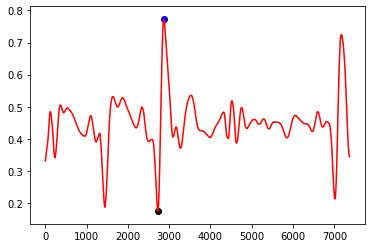

In [29]:
#plotting the values
j=list(mn_marked)
h=[]
for i in j[0:AO_index[1]+200]:
    h.append(i[0])
plt.plot(range(len(h)),h,color='r')
plt.scatter(IC_index[0:1],IC_value[0:1],color='black')
plt.scatter(AO_index[0:1],AO_value[0:1],color='blue')

plt.show()

In [457]:
#exporting the values
fp=open(dr+'v1_25052020_mean_IC_marked_first_half.csv','w')
for i in mn_marked[0:int(len(mn_marked)/2)]:
    fp.write(str(i[0])+','+str(i[1])+'\n')
print('finished')
fp.close()
fp=open(dr+'v1_25052020_mean_IC_marked_second_half.csv','w')
for i in mn_marked[int(len(mn_marked)/2):int(len(mn_marked))]:
    fp.write(str(i[0])+','+str(i[1])+'\n')
print('finished')
fp.close()

finished
finished


In [340]:
#exporting the values
fp=open(dr+'v2_24052020_mean_a_marked.csv','r')
hgf=[]
for i in fp.read().split('\n'):
    hgf.append(i)
print(len(hgf))    
fp.close()

1500001


In [344]:
mn11=list(mn)
len(mn11)

1500000

In [232]:
#getting the value
gf=[]
for i in mn:
    gf.append(i[0])
print('finished')    

finished


In [234]:
#counting the values
hg=[]
for i in ampl:
        c=gf.count(i)
        if c>1:
            hg.append([i,c])
print('finished')            

fiished


In [245]:
#exporting the values
fp=open('repeated_values.csv','w')
for i in hg:
    fp.write(i[0]+','+str(i[1])+'\n')
print('exported')
fp.close()

exported


In [214]:
#exporting the values
dr='dataset\SCG_b6\\'
fp=open(dr+'missing_values.csv','w')
for i in h:
    fp.write(i+'\n')
print('finished')
fp.close()

finished


In [93]:
#creating the array and marking the values
j=0
ln=len(mean['data'])
A_point=[]
for i in range(ln):
    A_point.append(0)
l=[]    
print('array created')
a=0
for i in range(ln):
        if mean['data'][i] in list(amp['amplitude']):
            A_point[i]=1
            a+=1
            if a%50==0:
                print(str(a)+"+")
print('n of values : '+str(a))            

array created
50+
100+
150+
200+
250+
n of values : 276


In [111]:
#marking the values
print(A_point.count(1))
A=[]
for i in range(1500000):
    A.append(0)
kl=list(index['index'])
for i in kl:
    A[i]=1
    for jj in range(0,76):
        A[jj+i]=1
        A[jj-1]=1
print('created')
print(A.count(1))
Ap=list(set(A).intersection(set(A_point)))
print(Ap.count(1))

276
created
17795
1
